In [538]:
# approximation of linear line (line we gonna predict)

# What we need to calculate?: We need to train the model on the training data so that we find the best
#   weights and the best bias. With these values kept from training we can actually then insert unkonwn
#   data x and ŷ will be calculated with already trained weights and bias

# ŷ = wx + b

# ŷ: predicted value of line
# w: weight (slope of line)
# b: bias (shift of line, offset)

In [539]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [540]:
# load data using sklearn make regression method
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [541]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

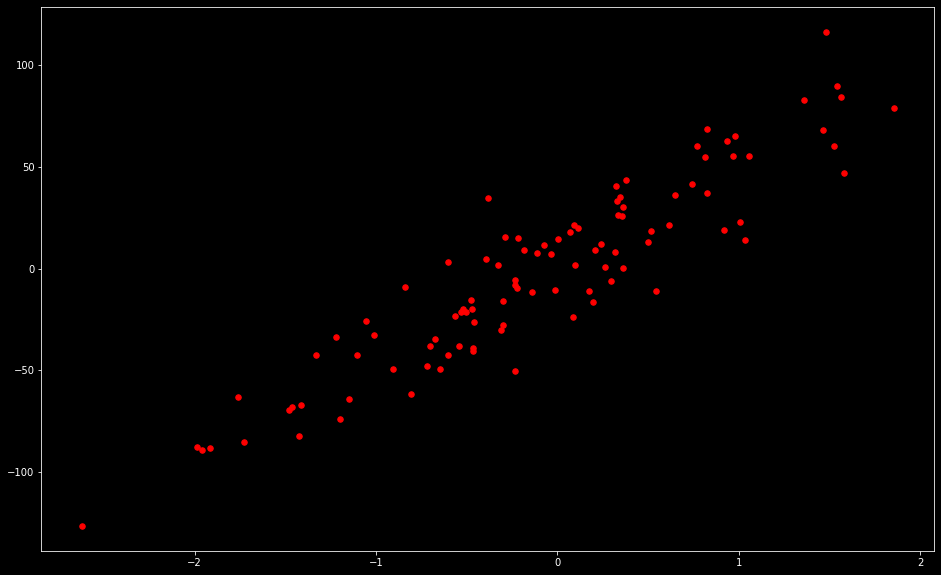

In [542]:
# visualise
plt.figure(figsize=(16, 10))
plt.style.use("dark_background")
plt.scatter(X, y, color="r", s=30)
plt.show()

In [543]:
X_train[:5]

array([[ 0.34361829],
       [-1.01283112],
       [-0.60063869],
       [ 1.52302986],
       [ 0.76743473]])

In [544]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.bias = None
        self.weights = None
    
    def fit(self, X, y):
        # initialize parameters (here with zeros)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # return vector [XX] not scalar
        self.bias = 0  # scalar
            
        # gradient descent loop
        for iteration in range(self.n_iterations):
            
            # calculate current iteration of line based on current weights and bias
            y_predicted = np.dot(X, self.weights) + self.bias  # ŷ = xw + b
            
            # calculate new weights
            # w = w - learning_rate * derivative_of_weight
            # derivative_w = 1/n_samples * sum(dotproduct(y_predicted - y_actual)) 
            derivative_w = (1/n_samples) * np.sum(np.dot(X.T, (y_predicted - y)))  # derivative_of_weight  
            self.weights -= np.dot(self.lr, derivative_w)  # subtract old weight with learning rate * deriv'_of_weight  
            
            # calculate new bias (similar formula as above except sum instead of dot product)
            derivative_b = (1/n_samples) * np.sum(y_predicted - y)  # derivative of bias
            self.bias -= np.dot(self.lr, derivative_b)
            
            # plot each iteration of y_predicted from initialization to best fit
            plt.plot(X_train, y_predicted)
            if iteration == self.n_iterations-1:
                plt.plot(X_train, y_predicted, color="blue")
                
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

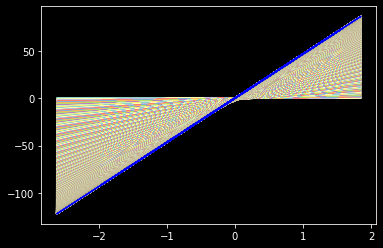

In [545]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

# you can check below how the line gets iteratively from completely horizontal position to position
# that best fits the training data (blue)

In [546]:
# cost function mean squared error
def mse(y_true, y_pred):
    return np.mean(y_true-y_pred)**2

In [547]:
mse_value = mse(y_test, predicted)
print("squared error", mse_value)

squared error 109.56247809040286


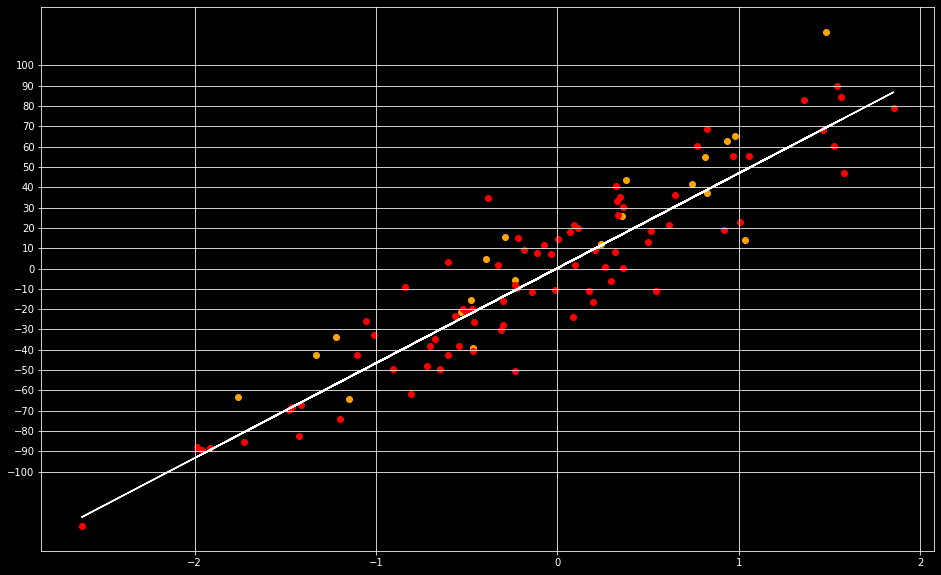

In [548]:
# check how predicted line fits on all data from X
y_pred_line = regressor.predict(X)

plt.figure(figsize=(16, 10))
plt.grid()
plt.yticks(ticks=list(range(-100, 110, 10)))
plt.scatter(X_test, y_test, color="orange")
plt.scatter(X_train, y_train, color="red")
plt.plot(X, y_pred_line, color="white")
plt.show()